# About this Dataset
Context
I am hoping this data is in someway useful to people competing in the COVID19 Global Forecasting challenge.

# Content
This file contains the Happiness Score for 153 countries along with the factors used to explain the score.

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

The Happiness Score is explained by the following factors:

- GDP per capita
- Healthy Life Expectancy
- Social support
- Freedom to make life choices
- Generosity
- Corruption Perception
- Residual error

The data is described in much more detail here:
https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf

Read dataset from kaggle

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Copy credencials of kaggle to correct place
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ./
!chmod 600 ~/.kaggle/kaggle.json
print("ok")

ok


In [5]:
# create folder of kaggle with url of dataset
od.download(
    "https://www.kaggle.com/datasets/mathurinache/world-happiness-report")

Skipping, found downloaded files in "./world-happiness-report" (use force=True to force download)


# Table of contents
1- Why to do EDA ?

2- Pandas, Numpy, Matplotlib, Seaborn

3- Data types

4- Exploring categorical features

5- Exploring numerical features

6 -Bivariate analysis

7- Outliers

# 1- Why to do EDA ?

In order to start working with data, we need to know what kind of data we are dealing with. That's the reason of inspecting and analysing data with EDA, exploratory data analysis.

Sample of question that we need to know the answer:

- size of dataset?

- data types ate categorical or numerical?

- Exist dates? which format of dates we have?

- Exist outliers? (Data points that are extremely different than all the other ones)

- Do we have missing data?


# Import libraries

## Pandas
used read_csv to read my csv data in a Pandas DataFrame.

Pandas is a software library created for data manipulation and analysis. Using pandas we can read various file formats easily into data structures specifically created for data manipulation procedures.

The most commonly used data structures in pandas are Series and DataFrame. Series stores one-dimensional data (like a table with only one column) and DataFrame stores 2-dimensional data (tables with multiple columns).

## Numpy
Numpy is a library mainly used for the Mathematical functions it implements. This way we don't have to write the functions ourselves all the time.

## Matplotlib
Matplotlib brings us data visualizations.

## Seaborn
Seaborn takes visualisations to the next level

In [6]:
# for  data manipulation and analysis
import pandas as pd

# for performing mathematical operations
import numpy as np

# to visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2- Read data file

In [7]:
# Read data (cvs file)

file =('/content/world-happiness-report/2020.csv')
df = pd.read_csv(file)
# , index_col=0

In [8]:
#let's set the precision to 2 decimal places
pd.set_option('display.precision', 2)

#the first 3 rows of our pandas DataFrame object
#if we run df.head(), display the first 5 rows by default
df.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.9,0.95,-0.06,0.20,1.97,1.29,1.50,0.96,0.66,0.16,0.48,2.76
1,Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.4,0.95,0.07,0.17,1.97,1.33,1.50,0.98,0.67,0.24,0.50,2.43
2,Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.1,0.92,0.11,0.30,1.97,1.39,1.47,1.04,0.63,0.27,0.41,2.35


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Pandas makes it easy to handle tabular data.

Tabular data means that our data fits or belongs in a table.

Other types of data can be visual (that is, images, for which it doesn't really make sense to be stored as csv files).

The standard way to store tabular data is that:

- each row represents a different observation. A new data point. If our data is about happiness in various countries, each row contains data for a new country.

- each column is a different feature (or attribute) of our observations. In World Happiness Report dataset, examples of features can be the Country name or the Regional indicator

With numpy library we can see the maximum value of the feature Ladder score across all observations in our dataset (all countries).

In [10]:
#and use a numpy function to see what's the maximum value for our Ladder score feature
np.max(df['Ladder score'])

7.808700085

The maximum values for "Ladder score" feature is 7.808.

The row number of the entry with the max Ladder score ?

In [11]:
df['Ladder score'].argmax()

0

see this observation's features (row where is the max of ladder)

In [12]:
df.iloc[df['Ladder score'].argmax()]

Country name                                         Finland
Regional indicator                            Western Europe
Ladder score                                            7.81
Standard error of ladder score                          0.03
upperwhisker                                            7.87
lowerwhisker                                            7.75
Logged GDP per capita                                  10.64
Social support                                          0.95
Healthy life expectancy                                 71.9
Freedom to make life choices                            0.95
Generosity                                             -0.06
Perceptions of corruption                                0.2
Ladder score in Dystopia                                1.97
Explained by: Log GDP per capita                        1.29
Explained by: Social support                             1.5
Explained by: Healthy life expectancy                   0.96
Explained by: Freedom to

# 3- Data Types

 To have an idea about or features types just by looking a the CSV file.

In [13]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

(None, (153, 20))

From above we can see that:

data is a DataFrame, with 153 entries (from 0 to 152)

We have 20 columns (from 0 to 19)

All columns have 153 non-null values (need to verify if exist "missing" data in any of these columns)

my column types are: object (2 of them) and float64* (18 of them)

*float64 means they can store fractional numbers and each number takes 64 bits

The 'object' type I see above most likely refers to a string. I'll use DataFrame indexing / selection to look at one particular value to verify my assumption.

In [14]:
# print sample value at position 0
print(df['Country name'][0])
print(df['Regional indicator'][0])


Finland
Western Europe


Object here is string type

# 4. Exploring categorical features

We have 2 features which contain text:

Country

Region

Country

We need to check if each country is unique in our dataset (one country per row). This is what is expect from a study of happiness levels in different countries across the worls.
So we need to verify this assumption, to make sure we don't have errors in our data.

In [15]:
#how many entries we have for each country
#shown in descending order (highest value first)
df["Country name"].value_counts().sort_values(ascending=False)

Finland                     1
Austria                     1
United States               1
Switzerland                 1
Iceland                     1
                           ..
Central African Republic    1
Rwanda                      1
Zimbabwe                    1
South Sudan                 1
Afghanistan                 1
Name: Country name, Length: 153, dtype: int64

So the countries are unique

In [16]:
#Uncomment the line below to see what data type we used. This is a nice way to explore the functioning of pandas.
print("\nThe code above returns a date of type: ", type(df['Country name'].value_counts()))


The code above returns a date of type:  <class 'pandas.core.series.Series'>


regions

what different regions we have?

In [17]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

We see in the output above that:

- Europe is split into 2: 'Western Europe' and 'Central and Eastern Europe'

- The Americas are divided into 2: 'Latin America and Caribbean' and 'North America and ANZ' (which is North America, Australia and New Zealand)

- Africa is split into 2: 'Sub-Saharan Africa' and 'Middle East and North Africa'

- Asia is divided into 3: 'Southeast Asia', 'South Asia' and 'East Asia'

- There is a group of post-Soviet republics in Eurasia making up the 'Commonwealth of Independent States'

In [18]:
#we have 10 regions and pandas DataFrame has a method to find this out
print(f"The number of regions in our dataset is: {df['Regional indicator'].nunique()}")
print(f"The number of countries in our dataset is: {df['Country name'].nunique()}")

The number of regions in our dataset is: 10
The number of countries in our dataset is: 153


## Univariate analysis

All the explorations below belong to univariate analysis, we are looking to each variable individually.

**Visualisation for categorical features**

The frequencies (the number of times they appear in our dataset) of our regions is greater than one, so we need to look at them in deep, with data visualization.

For countries, we have each appeared once in our data.
So for regions, we can use a bar chart.

The bar chart below shows the same information as previous table above.
In visual form it's so much easier to gain insights regarding regions.

Pandas built-in capabilities for data visualization

<Axes: title={'center': 'Absolute frequency distribution of Regional indicator'}>

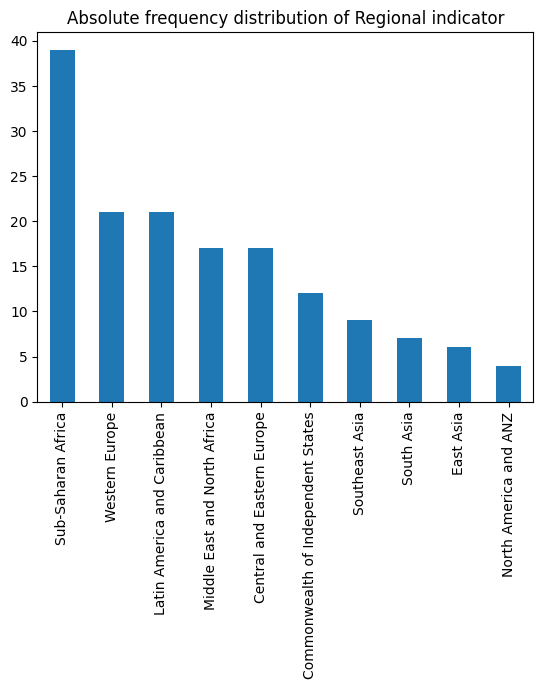

In [19]:
regional_indicator = df['Regional indicator'].value_counts()

regional_indicator.plot(kind='bar', title='Absolute frequency distribution of Regional indicator')

The numbers at plot are absolute frequencies, which means that the bar chart shows the number of times each region is present in our dataset.

<Axes: title={'center': 'Relative frequency of Regional indicators'}>

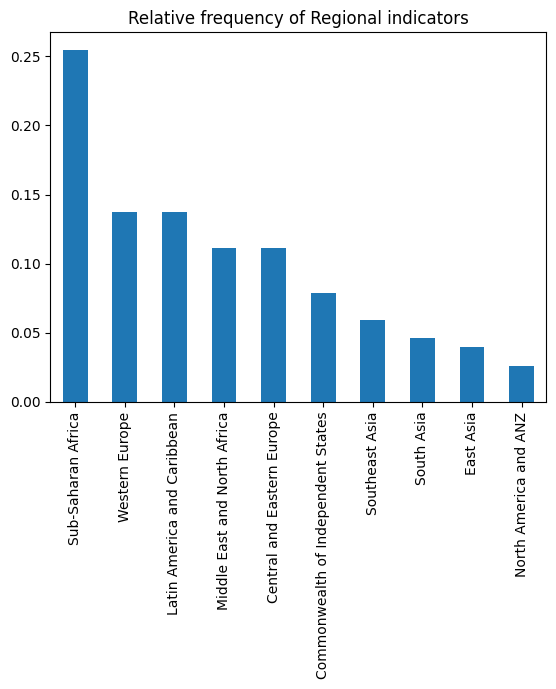

In [20]:
relative_frequency=regional_indicator/df.shape[0] # to get the percentage

relative_frequency.plot(kind='bar', title='Relative frequency of Regional indicators')

Sub-Saharan Africa represents 25% of our data.

# 5. Exploring numerical features

Pandas has a built-in method that performs descriptive statistics on a DataFrame.
This method shows:

- the number of values for each feature (another opportunity to see if we have missing values for any feature)

- the mean value

- the standard error

- the min and max value

- the median of our data (50%)

- the lower and upper quartile (25% and 75%)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,153.0,5.47,1.11e+00,2.57,4.72,5.51,6.23,7.81
Standard error of ladder score,153.0,0.05,1.82e-02,0.03,0.04,0.05,0.06,0.12
upperwhisker,153.0,5.58,1.10e+00,2.63,4.83,5.61,6.36,7.87
lowerwhisker,153.0,5.37,1.13e+00,2.51,4.60,5.43,6.14,7.75
Logged GDP per capita,153.0,9.30,1.20e+00,6.49,8.35,9.46,10.27,11.45
Social support,153.0,0.81,1.21e-01,0.32,0.74,0.83,0.91,0.97
Healthy life expectancy,153.0,64.45,7.06e+00,45.20,58.96,66.31,69.29,76.80
Freedom to make life choices,153.0,0.78,1.18e-01,0.40,0.71,0.80,0.88,0.97
Generosity,153.0,-0.01,1.52e-01,-0.30,-0.13,-0.03,0.09,0.56
Perceptions of corruption,153.0,0.73,1.75e-01,0.11,0.68,0.78,0.85,0.94


Insights from the descriptive statistics above:

- Ladder score actually goes from 2.57 to 7.81. There's no 0 or 10.

- Healthy life expectancy has a minimum of 45.20 and a maximum of 76.80. This is a large range. There are countries in our dataset where life expenctancy is 45 years !

- Generosity can be negative. It's the only feature that has negative values.

- Other features are more difficult to interpret from the descriptive stats above.

Numerical data is best viewed as histograms. For this we will use matplotlit and seaborn for this.

In [22]:
#Rename column

# df = df.rename(columns = {"Country name": "Country_name","Regional indicator":"Regional_indicator",
#     "Ladder score":"Ladder_score",
# "Standard error of ladder score":"Standard_error_of_ladder_score",
# "upperwhisker":"upperwhisker",
# "lowerwhisker":"lowerwhisker",
# "Logged GDP per capita":"Logged_GDP_per_capita",
# "Social support":"Social_support",
# "Healthy life expectancy":"Healthy_life_expectancy",
# "Freedom to make life choices":"Freedom_to_make_life_choices",
# "Generosity":"Generosity",
# "Perceptions of corruption":"Perceptions_of_corruption",
# "Ladder score in Dystopia":"Ladder_score_in_Dystopia",
# "Explained by: Log GDP per capita":"Explained_by:_Log_GDP_per_capita",
# "Explained by: Social support":"Explained_by:_Social_support",
# "Explained by: Healthy life expectancy":"Explained_by:_Healthy_life_expectancy",
# "Explained by: Freedom to make life choices":"Explained_by:_Freedom_to_make_life_choices",
# "Explained by: Generosity":"Explained_by:_Generosity",
# "Explained by: Perceptions of corruption":"Explained_by:_Perceptions_of_corruption",
# "Dystopia + residual":"Dystopia_+_residual"})

df.head()





,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.9,0.95,-0.06,0.20,1.97,1.29,1.50,0.96,0.66,0.16,0.48,2.76
1,Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.4,0.95,0.07,0.17,1.97,1.33,1.50,0.98,0.67,0.24,0.50,2.43
2,Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.1,0.92,0.11,0.30,1.97,1.39,1.47,1.04,0.63,0.27,0.41,2.35
3,Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.0,0.95,0.25,0.71,1.97,1.33,1.55,1.00,0.66,0.36,0.14,2.46
4,Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.2,0.96,0.13,0.26,1.97,1.42,1.50,1.01,0.67,0.29,0.43,2.17


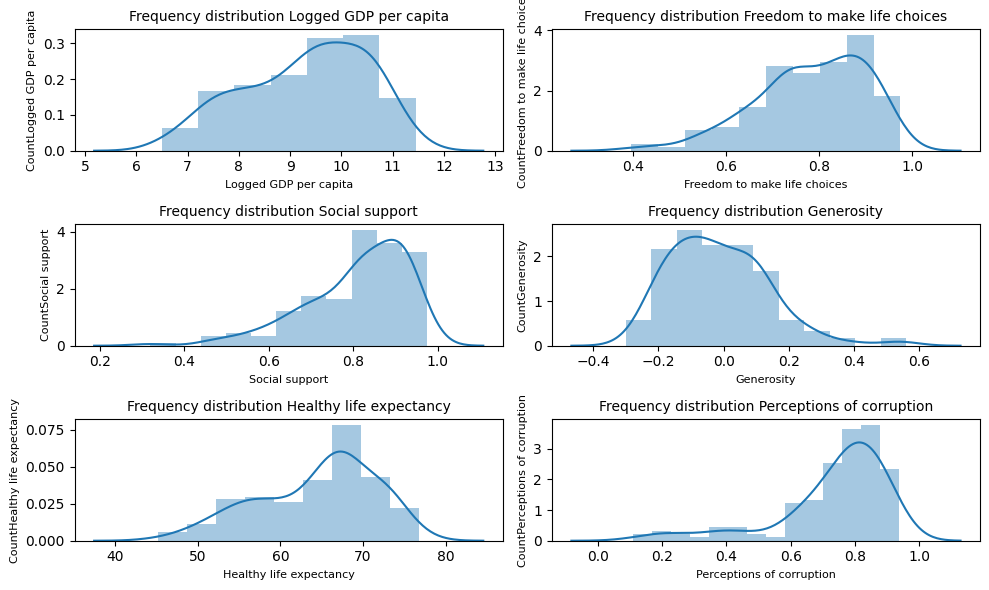

In [25]:
columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',\
           'Perceptions of corruption']
# print(len(columns))

scols = int(len(columns)/2)
srows = 2
fig, axes = plt.subplots(scols, srows, figsize=(10,6))

#create the matrix for print the plots
for i, col in enumerate(columns):
  ax_row = int(i%scols) #define the place of rows from i=1 to i=5 with rest of division (0, 1, 2)
  ax_col = int(i/scols) #define the place of columns from i=1 to i=5 with division (0,1)
  #print(ax_col, ax_row)

  sns.distplot(df[col], hist=True, ax=axes[ax_row, ax_col])
  axes[ax_row, ax_col].set_title('Frequency distribution '+col, fontsize=10)
  axes[ax_row, ax_col].set_xlabel(col, fontsize=8)
  axes[ax_row, ax_col].set_ylabel('Count'+col, fontsize=8)
fig.tight_layout()
plt.show()

In [26]:
0%3, 1%3, 2%3, 3%3, 4%3, 5%3

(0, 1, 2, 0, 1, 2)

In [27]:
int(0/3), int(1/3), int(2/3), int(3/3), int(4/3), int(5/3)

(0, 0, 0, 1, 1, 1)

Insights from the visual exploration of our numerical data:

- the distributions of GDP, social support, healthy life expectancy, freedom and corruption are all *left skewed (or negative skew)*. This means, most of our values do not happen to be in the middle of the min-max range, but are pushed towards the upper end of our range. This is good news for all these features, but for Perception of corruption it isn't.

- generosity is *right skewed*. The majority of the countries are in the bottom half of the generosity scale (unfortunately).

# 6. Bivariate analysis

Looking to pairs of two variables we may explore a possible relation between them.


To perform a bivariate analysis, we need to look at scatterplots which search for clouds of dots that arrange themselves into straight diagonal lines. This is a visual representation of two variables that correlate.

How to read the plots below:

- Looking to image of "Logged GDP per capita" (plot position first row and second column).

- For first row the y axis (the vertical axis) is the Logged GDP per capita as the label of the Y axis.

- Under the second column we have "Social support" as the name of the X axis.
All plots on the second columns have the Social support on the x axis (the horizontal axis).

- As the 'Social support' increases, so does 'Logged GDP per capita'. So these two features seems to be correlated (correlation, not causation). We can say intuitively that as the country gets riches it can afford to offer more social support to its inhabitants.

- Looking to fourth subplot on the same row. The datapoints are all over place, so seems to be no correlation between 'GDP per capita' and 'Freedom to make life choices'.


The analysis of correlation should not be done just by looking at a scatterplot, but this is a good start. The corr() method calculates the relationship between each column in your data set.

On the diagonal are presented the univariate analysis, the histograms.

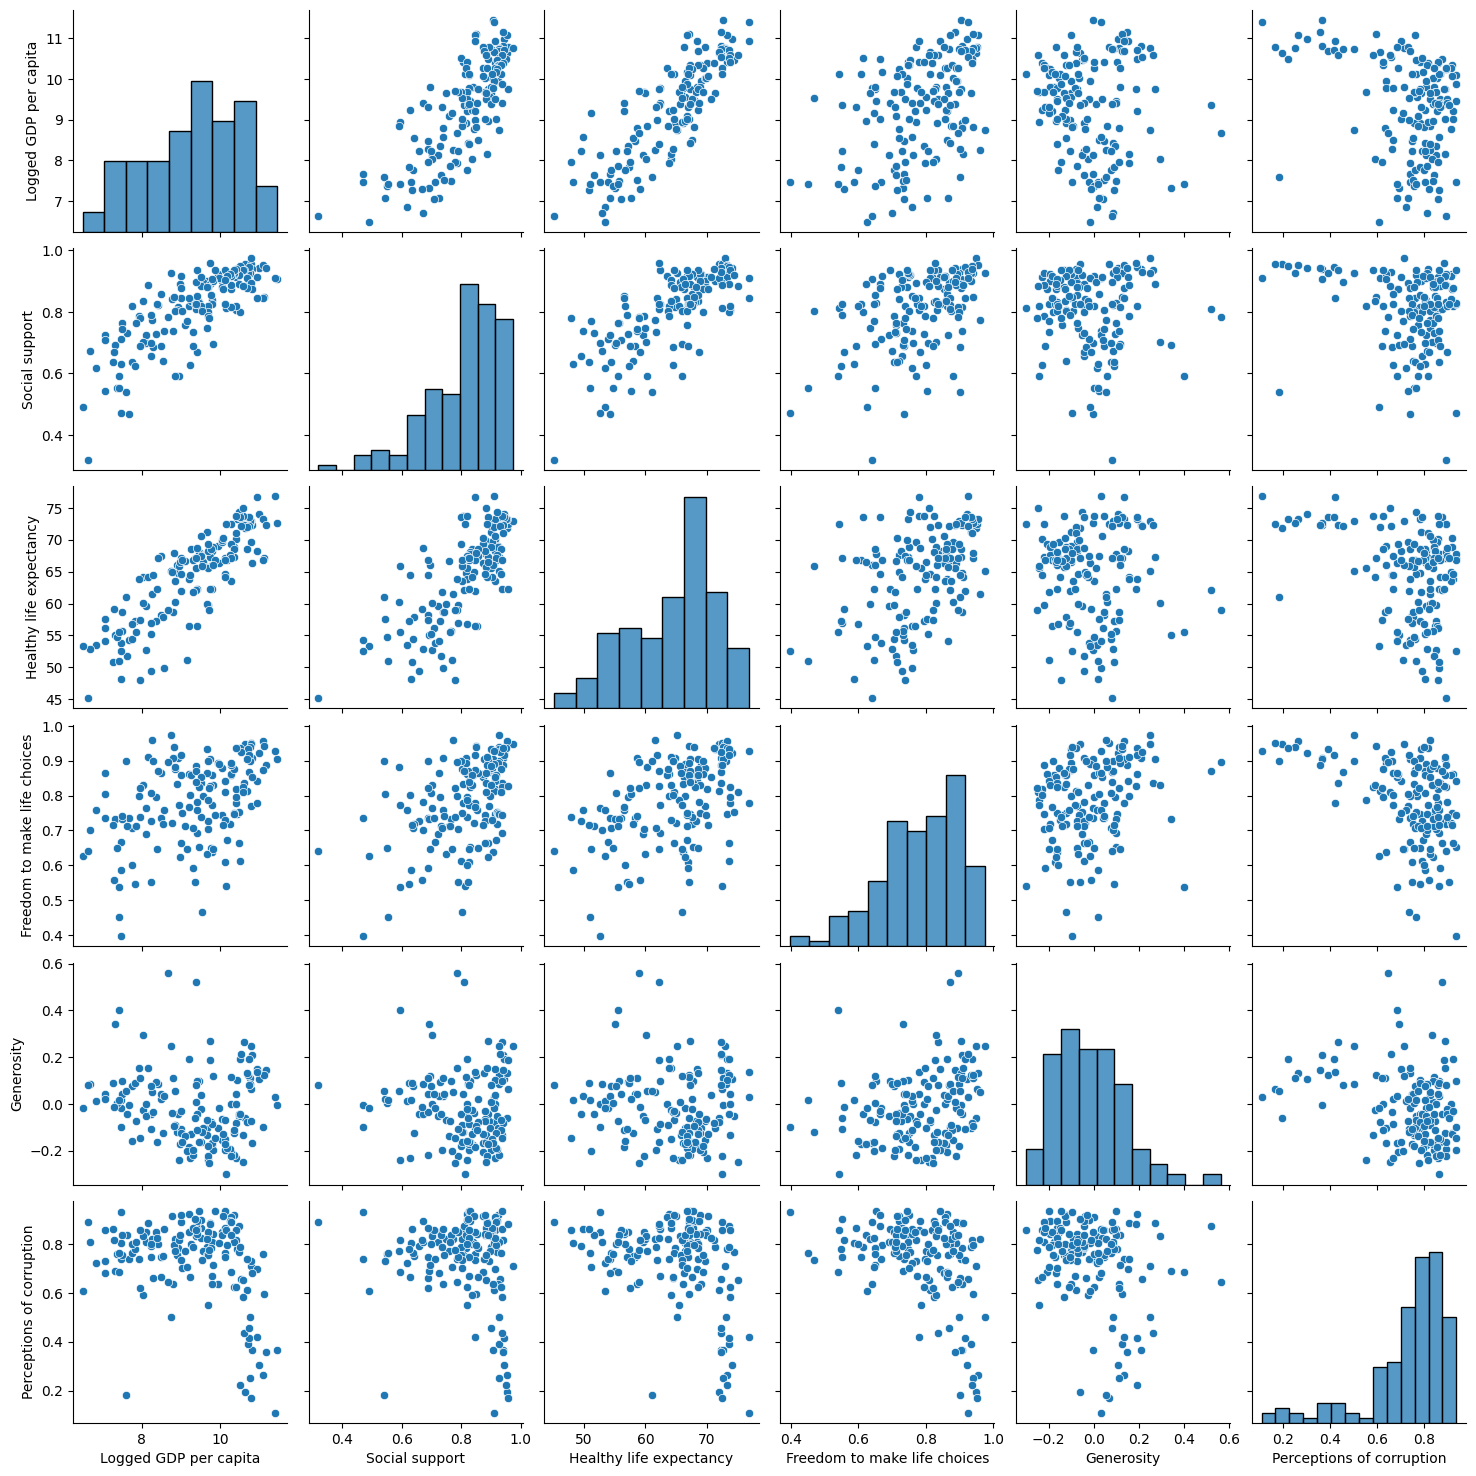

In [28]:
columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',\
           'Perceptions of corruption']
sns.pairplot(df[columns]) # with hue="categories" to have the datapoints with different colors



Seaborn allows us to add a 'hue' to our plots. We will set our scatterplots to assign different colors to datapoints that belong to different global regions, or countries.
Link: https://seaborn.pydata.org/generated/seaborn.pairplot.html


In [31]:
for col in df.columns:
    print(col)

Country name
Regional indicator
Ladder score
Standard error of ladder score
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
Explained by: Log GDP per capita
Explained by: Social support
Explained by: Healthy life expectancy
Explained by: Freedom to make life choices
Explained by: Generosity
Explained by: Perceptions of corruption
Dystopia + residual


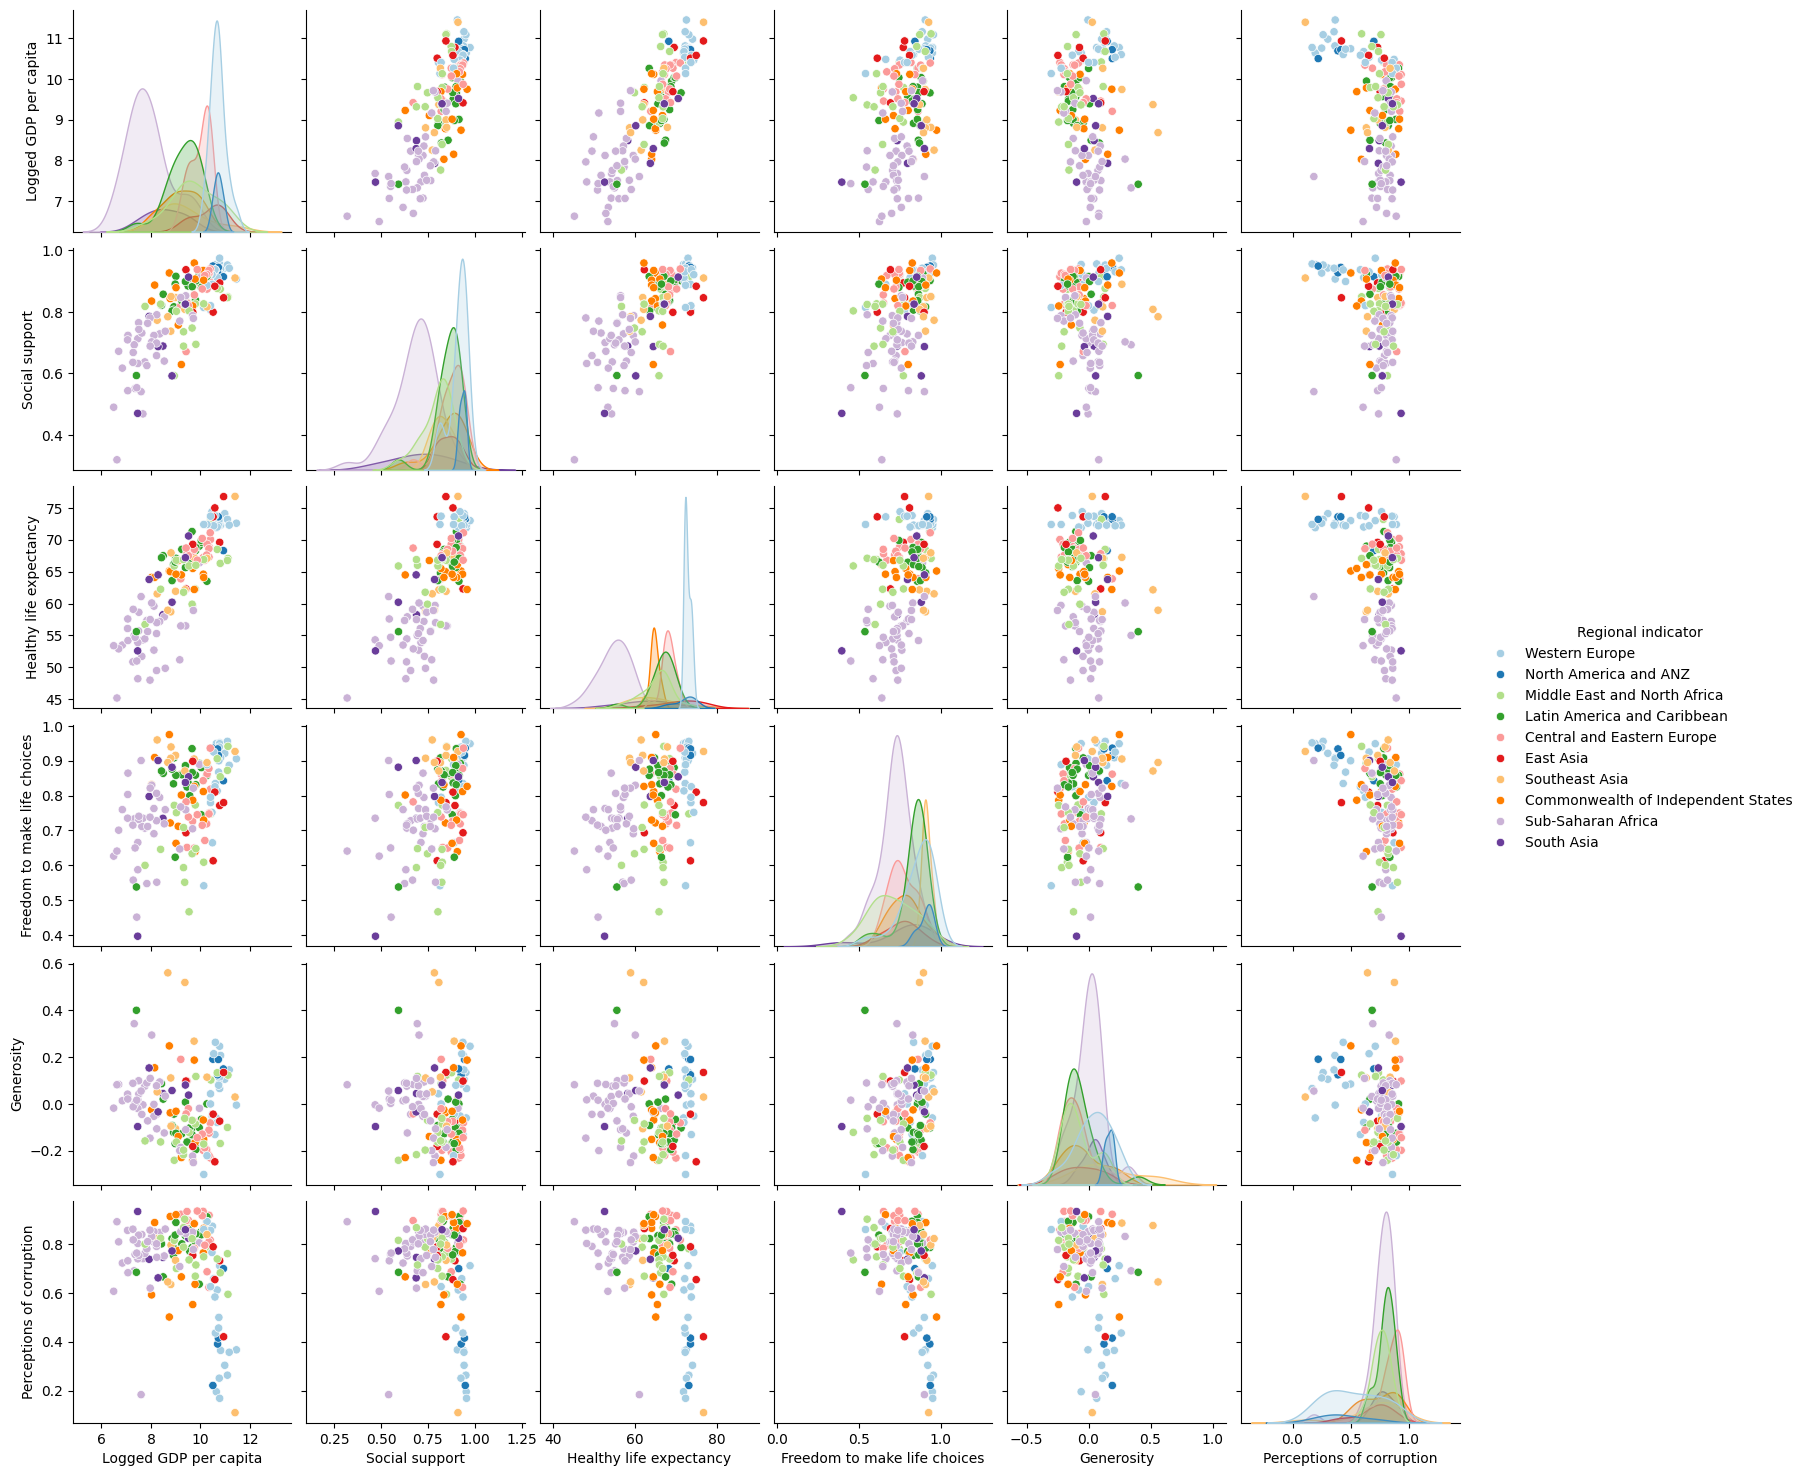

In [32]:
columns = ['Regional indicator','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',\
           'Perceptions of corruption']
sns.pairplot(df[columns], hue="Regional indicator", palette="Paired")


This helps to gain insight like: Sub-Saharan African countries (the purple dots, according to the legend on the right) have the lowest GDP and the lowest Healthy life expectancy, but they are not less generous than more fortunate countries.

Another useful tool in the EDA toolset is the **correlation matrix**.

<Axes: >

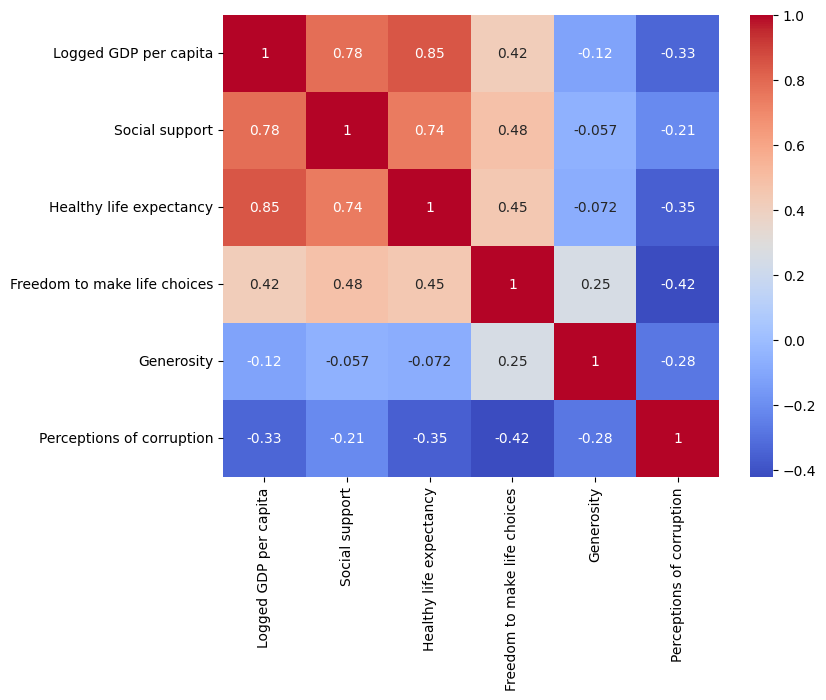

In [34]:
meaningful_columns = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Ladder score in Dystopia']

plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')
sns.heatmap(df[columns].corr(), annot = True, fmt='.2g', cmap= 'coolwarm')

As above the greatest correnlation are between features:

- healthy life expectancy and GDP per capita
- social support and GDP per capita


# 7. Outliers
A nice way to spot outliers is a Box and Whiskers plot.

<Axes: >

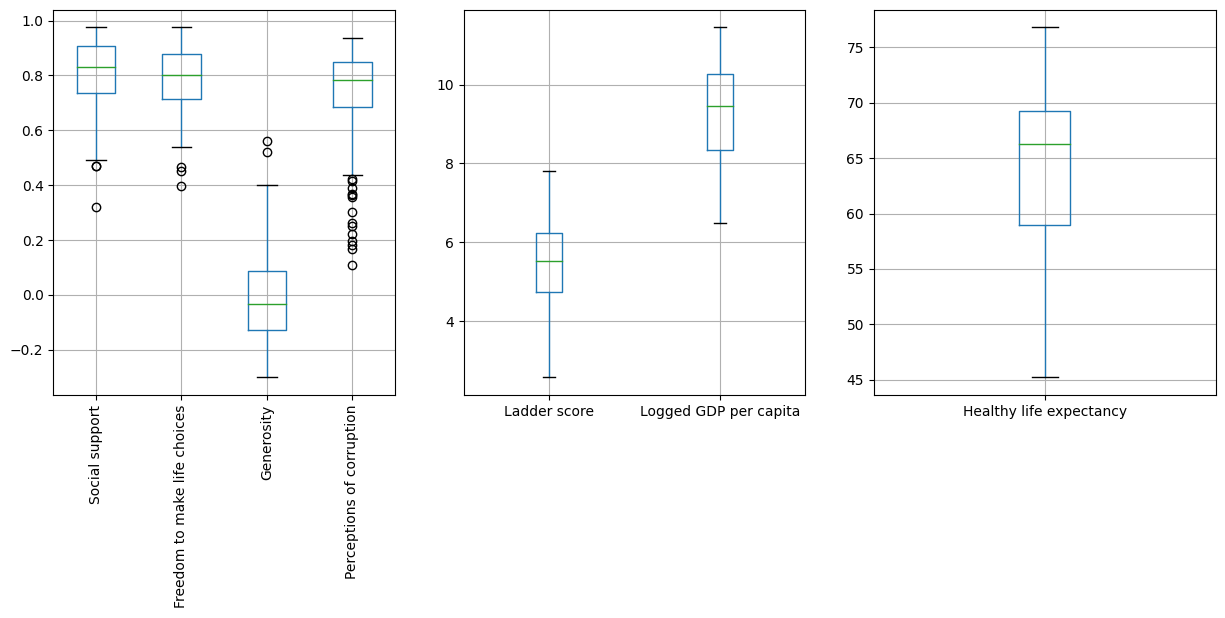

In [37]:
small = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
medium = ['Ladder score', 'Logged GDP per capita']
large = ['Healthy life expectancy']

f, axs = plt.subplots(1,3,figsize=(15,5))

# equivalent but more general
ax1=plt.subplot(1, 3, 1)
df.boxplot(column=small, ax = ax1)
plt.xticks(rotation=90)

ax2=plt.subplot(1, 3, 2)
df.boxplot(column=medium, ax = ax2)

ax3=plt.subplot(1, 3, 3)
df.boxplot(column=large, ax = ax3)

By stattistics,  whatever falls outside the 'whiskers' represents an outlier.
More information about boxplots:
https://publiclab.org/notes/mimiss/06-18-2019/creating-a-boxplot-to-identify-outliers-using-codap


Inspecting the case of Perceptions of corruption.

<Axes: >

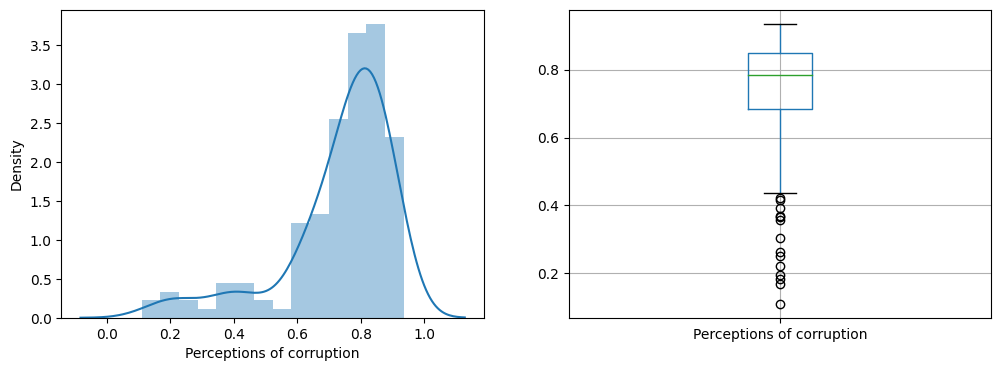

In [38]:
f, axs = plt.subplots(1,2,figsize=(12,4))

# equivalent but more general
ax1=plt.subplot(1, 2, 1)
sns.distplot(df['Perceptions of corruption'], hist=True, ax=ax1)

ax2=plt.subplot(1, 2, 2)
df.boxplot(column=['Perceptions of corruption'], ax = ax2)

'Perceptions of corruption' feature is left skewed, so countries with lowest perception of corruption are automatically categorized as outliers in the boxplot.

But having outliers does not necessarily mean we should do something about them.

We should analyse if the data correct ?
who these outliers are?

In [48]:
#Uncomment the code below, line by line, if you want to dissect the previous line of code.
#I find it useful to first make a hypothesis about what I expect the line of code does before running it.

print(f'df has {len(df)} entries')

df['Perceptions of corruption'] < 0.4 # filter observation with less than 0.4 in true or false

df[df['Perceptions of corruption'] < 0.4].shape # new df for the filter above (12 rows for 20 columns)

print(f"our selection has {len(df[df['Perceptions of corruption'] < 0.4])} entries") #12 records

(df[df['Perceptions of corruption'] < 0.4])[['Country name', 'Perceptions of corruption']] #select 2 columns

df has 153 entries
our selection has 12 entries


,Country name,Perceptions of corruption
0,Finland,0.20
1,Denmark,0.17
2,Switzerland,0.30
4,Norway,0.26
5,Netherlands,0.36
6,Sweden,0.25
7,New Zealand,0.22
9,Luxembourg,0.37
10,Canada,0.39
15,Ireland,0.36


In [39]:
(df[df['Perceptions of corruption']<0.4])[['Country name', 'Perceptions of corruption']].sort_values(by= 'Perceptions of corruption', axis=0, ascending=True)

,Country name,Perceptions of corruption
30,Singapore,0.11
1,Denmark,0.17
149,Rwanda,0.18
0,Finland,0.20
7,New Zealand,0.22
6,Sweden,0.25
4,Norway,0.26
2,Switzerland,0.30
15,Ireland,0.36
5,Netherlands,0.36


these countries have lower corruption.